# WeatherPy
----

### Analysis
* As expected, the weather becomes significantly warmer as one approaches the equator (0 Deg. Latitude). More interestingly, however, is the fact that the southern hemisphere tends to be warmer this time of year than the northern hemisphere. This may be due to the tilt of the earth.
* There is no strong relationship between latitude and cloudiness. However, it is interesting to see that a strong band of cities sits at 0, 80, and 100% cloudiness.
* There is no strong relationship between latitude and wind speed. However, in northern hemispheres there is a flurry of cities with over 20 mph of wind.

---

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from datetime import datetime

# Import API key
from config import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

601

In [3]:
# create a dataframe
cities_df = pd.DataFrame(cities)
cities_df = cities_df.rename(columns={0:"City"})


### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [4]:
# Create additional columns to store data from API request
cities_df['Country'] = ''
cities_df['Longitude'] = ''
cities_df['Latitude'] = ''
cities_df['Date'] = ''
cities_df['Cloudiness'] = ''
cities_df['Temperature Max'] = ''
cities_df['Humidity'] = ''
cities_df['Wind speed'] = ''


# Create counter
row_count = 1

# loop through cities, make API request, and append desired results
print("Beginning Data Retrieval")
print("-------------------------")

# Create a dictionary with parameters to access API
access = {"appid": api_key, "units": "imperial"}

# Base url
url = "http://api.openweathermap.org/data/2.5/weather?"

# Build partial query url
query_url = f"{url}appid={access['appid']}&units={access['units']}&q="


for index, row in cities_df.iterrows():
    city = row["City"]
    #response = requests.get(url + city).json()
    response = requests.get(query_url + city).json()
  
    if response['cod'] != "404":
        cities_df.set_value(index, "Country", response["sys"]["country"])
        cities_df.set_value(index,"Longitude", response["coord"]["lon"])
        cities_df.set_value(index, "Latitude", response["coord"]["lat"])
        cities_df.set_value(index, "Date", response['dt'])
        cities_df.set_value(index, "Cloudiness", response["clouds"]["all"])
        cities_df.set_value(index, "Temperature Max", response["main"]["temp_max"])
        cities_df.set_value(index, "Humidity", response["main"]["humidity"])
        cities_df.set_value(index, "Wind speed", response["wind"]["speed"])
        
        print(f"Processing Record {row_count} | {city}")
        
        row_count += 1
   
    else:
        print(f"City not found. Skipping...")
        
print("------------------------")
print("Data Retrieval Complete")
print("------------------------")
                                     
        


Beginning Data Retrieval
-------------------------


C:\Users\dbik\Anaconda3\lib\site-packages\ipykernel_launcher.py:35: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
C:\Users\dbik\Anaconda3\lib\site-packages\ipykernel_launcher.py:36: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
C:\Users\dbik\Anaconda3\lib\site-packages\ipykernel_launcher.py:37: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
C:\Users\dbik\Anaconda3\lib\site-packages\ipykernel_launcher.py:38: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
C:\Users\dbik\Anaconda3\lib\site-packages\ipykernel_launcher.py:39: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
C:\Users\dbik\Anaconda3\lib\site-pa

Processing Record 1 | trairi
Processing Record 2 | hirara
Processing Record 3 | georgetown
City not found. Skipping...
Processing Record 4 | pali
Processing Record 5 | hofn
Processing Record 6 | mataura
Processing Record 7 | iqaluit
Processing Record 8 | port elizabeth
Processing Record 9 | qingdao
Processing Record 10 | hithadhoo
Processing Record 11 | ushuaia
Processing Record 12 | humberto de campos
Processing Record 13 | atbasar
Processing Record 14 | albany
Processing Record 15 | hualmay
Processing Record 16 | torbay
Processing Record 17 | hobart
Processing Record 18 | upernavik
Processing Record 19 | albion
City not found. Skipping...
Processing Record 20 | luderitz
Processing Record 21 | tasiilaq
Processing Record 22 | ponta do sol
Processing Record 23 | new norfolk
Processing Record 24 | longyearbyen
Processing Record 25 | ewa beach
Processing Record 26 | butaritari
Processing Record 27 | busselton
Processing Record 28 | lompoc
Processing Record 29 | jamestown
Processing Record

Processing Record 229 | abu samrah
Processing Record 230 | laguna
Processing Record 231 | porbandar
Processing Record 232 | lagoa
Processing Record 233 | egvekinot
Processing Record 234 | havelock
City not found. Skipping...
Processing Record 235 | along
Processing Record 236 | komsomolskiy
Processing Record 237 | tangua
City not found. Skipping...
Processing Record 238 | lavrentiya
Processing Record 239 | maningrida
Processing Record 240 | hilo
City not found. Skipping...
Processing Record 241 | kamaishi
Processing Record 242 | bria
Processing Record 243 | sitka
City not found. Skipping...
Processing Record 244 | ayan
Processing Record 245 | ixtapa
Processing Record 246 | cockburn town
Processing Record 247 | madimba
Processing Record 248 | mecca
Processing Record 249 | masty
Processing Record 250 | tapolca
Processing Record 251 | sechura
Processing Record 252 | markova
Processing Record 253 | marawi
Processing Record 254 | jumla
Processing Record 255 | esperance
Processing Record 256

Processing Record 459 | petropavlovka
Processing Record 460 | ballina
City not found. Skipping...
Processing Record 461 | antalaha
Processing Record 462 | namatanai
Processing Record 463 | khorixas
Processing Record 464 | goderich
Processing Record 465 | salinopolis
Processing Record 466 | ormara
City not found. Skipping...
Processing Record 467 | manturovo
Processing Record 468 | phan thiet
Processing Record 469 | porto novo
Processing Record 470 | yendi
Processing Record 471 | humaita
Processing Record 472 | gornopravdinsk
Processing Record 473 | mandera
Processing Record 474 | wanning
Processing Record 475 | port-gentil
Processing Record 476 | hovd
Processing Record 477 | tricase
Processing Record 478 | licab
Processing Record 479 | artigas
City not found. Skipping...
Processing Record 480 | souillac
Processing Record 481 | christchurch
Processing Record 482 | ulladulla
Processing Record 483 | rocha
Processing Record 484 | nisia floresta
Processing Record 485 | leshukonskoye
Process

In [5]:
cities_df.head()

,City,Country,Longitude,Latitude,Date,Cloudiness,Temperature Max,Humidity,Wind speed
0,trairi,BR,-39.27,-3.28,1539223927,8,79.74,100,24.29
1,hirara,JP,125.28,24.8,1539219600,75,80.6,78,12.75
2,georgetown,GY,-58.16,6.8,1539219600,0,77,94,4.7
3,mrirt,,,,,,,,
4,pali,IN,73.33,25.77,1539223655,0,79.38,37,4.5


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [6]:
cities_df.count()

City               601
Country            601
Longitude          601
Latitude           601
Date               601
Cloudiness         601
Temperature Max    601
Humidity           601
Wind speed         601
dtype: int64

In [7]:
cities_df[["Latitude", "Temperature Max"]] = cities_df[["Latitude", "Temperature Max"]].apply(pd.to_numeric, errors='coerce')

In [8]:
cities_df.head()

,City,Country,Longitude,Latitude,Date,Cloudiness,Temperature Max,Humidity,Wind speed
0,trairi,BR,-39.27,-3.28,1539223927,8,79.74,100,24.29
1,hirara,JP,125.28,24.80,1539219600,75,80.60,78,12.75
2,georgetown,GY,-58.16,6.80,1539219600,0,77.00,94,4.7
3,mrirt,,,NaN,,,NaN,,
4,pali,IN,73.33,25.77,1539223655,0,79.38,37,4.5


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

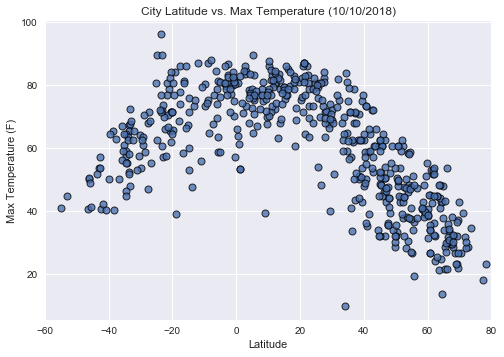

In [10]:
#Build a scatter plot for Latitude vs. Temperature

plt.scatter(cities_df["Latitude"], 
            cities_df["Temperature Max"], edgecolor="black", linewidths=1, marker="o",\
            cmap='plasma', alpha=0.8, label="City")

#Incorporate the other graph properties
plt.style.use('seaborn')
plt.title(f"City Latitude vs. Max Temperature ({datetime.now().strftime('%m/%d/%Y')})")
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)
plt.xlim([-60, 80])
# plt.ylim([-60, 120])

# Save the figure
plt.savefig("Latitude_Temperature.png")

# Show plot
plt.show()

#### Latitude vs. Humidity Plot

In [17]:
cities_df["Humidity"] = cities_df["Humidity"].apply(pd.to_numeric, errors='coerce')

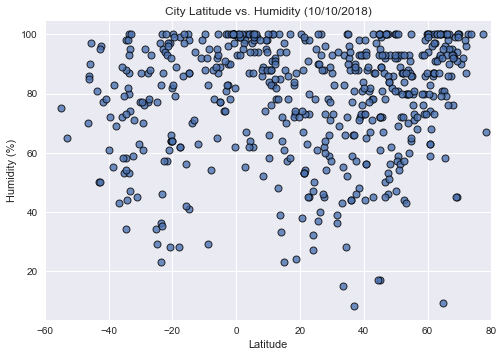

In [15]:
#Build a scatter plot for Latitude vs. Humidity

plt.scatter(cities_df["Latitude"], 
            cities_df["Humidity"], edgecolor="black", linewidths=1, marker="o",\
            cmap='plasma', alpha=0.8, label="City")

#Incorporate the other graph properties
plt.style.use('seaborn')
plt.title(f"City Latitude vs. Humidity ({datetime.now().strftime('%m/%d/%Y')})")
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
plt.xlim([-60, 80])
# plt.ylim([-60, 120])

# Save the figure
plt.savefig("Latitude_Humidity.png")

# Show plot
plt.show()

#### Latitude vs. Cloudiness Plot

In [16]:
cities_df ["Cloudiness"]= cities_df["Cloudiness"].apply(pd.to_numeric, errors='coerce')

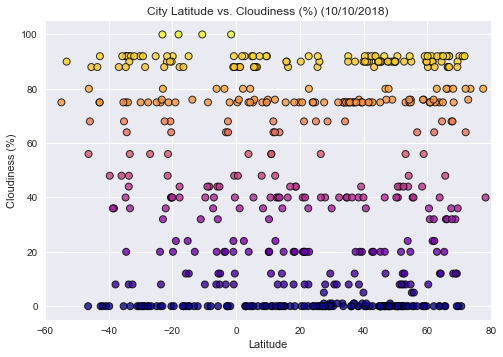

In [17]:
#Build a scatter plot for Latitude vs. Cloudiness (%)

plt.scatter(cities_df["Latitude"], 
            cities_df["Cloudiness"], c=cities_df["Cloudiness"],
            edgecolor="black", linewidths=1, marker="o", 
            cmap='plasma', alpha=0.8, label="City")

# Incorporate the other graph properties
plt.style.use('seaborn')
plt.title(f"City Latitude vs. Cloudiness (%) ({datetime.now().strftime('%m/%d/%Y')})")
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
plt.xlim([-60, 80])
#plt.ylim([-10, 125])

# Save the figure
plt.savefig("Latitude_Cloudiness.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

In [18]:
cities_df ["Wind speed"]= cities_df["Wind speed"].apply(pd.to_numeric, errors='coerce')

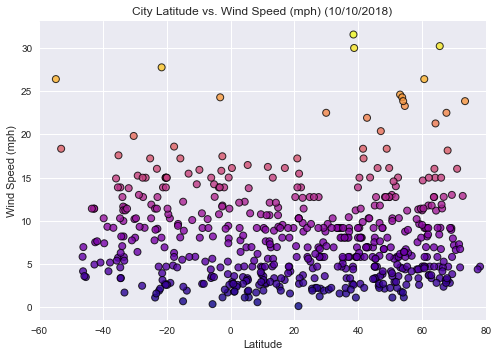

In [19]:
#Build a scatter plot for Latitude vs. Wind Speed (mph)

plt.scatter(cities_df["Latitude"], 
            cities_df["Wind speed"], c=cities_df["Wind speed"],
            edgecolor="black", linewidths=1, marker="o", 
            cmap='plasma', alpha=0.8, label="City")

# Incorporate the other graph properties
plt.style.use('seaborn')
plt.title(f"City Latitude vs. Wind Speed (mph) ({datetime.now().strftime('%m/%d/%Y')})")
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
plt.xlim([-60, 80])
#plt.ylim([-10, 50])

# Save the figure
plt.savefig("Latitude_WindSpeed.png")

# Show plot
plt.show()